## Imports

In [1]:
import pandas as pd
import json
import os
import math
import numpy as np
import librosa, librosa.display

## READ DATASET

In [2]:
df = pd.read_csv("Data/features_3_sec.csv")
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


## EDA

In [3]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,label,count
0,blues,1000
1,jazz,1000
2,pop,1000
3,reggae,1000
4,metal,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


In [4]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df = df.drop(labels="filename", axis=1)

In [7]:
df.head(10)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,4371.985614,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,4325.026668,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,3625.280386,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,3586.934721,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,3505.522649,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


## Sample Data Visualizations

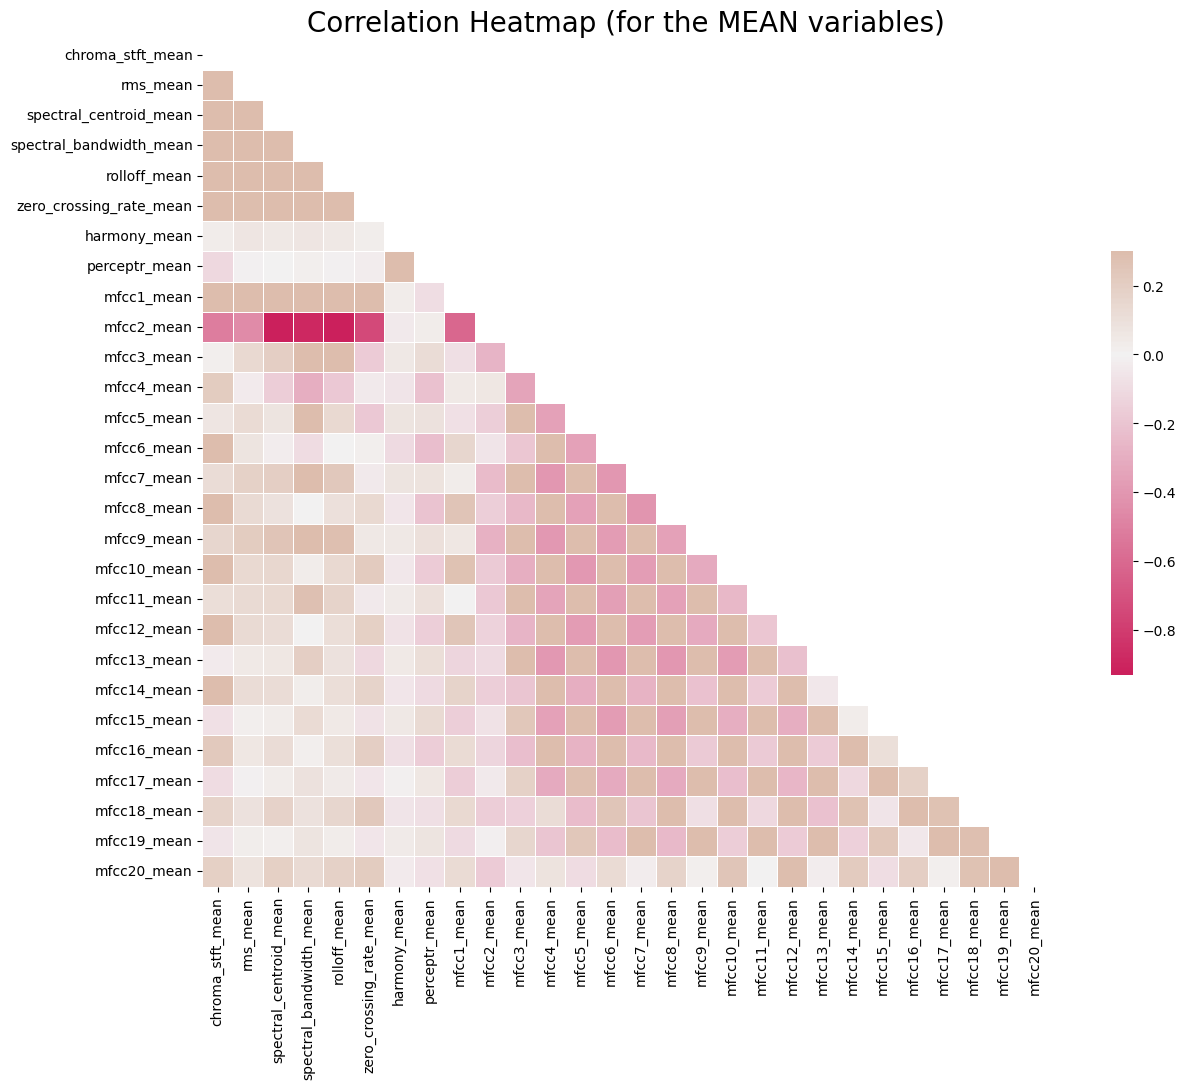

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

C:\Users\aruna\AppData\Local\Temp\ipykernel_46024\3760914025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');


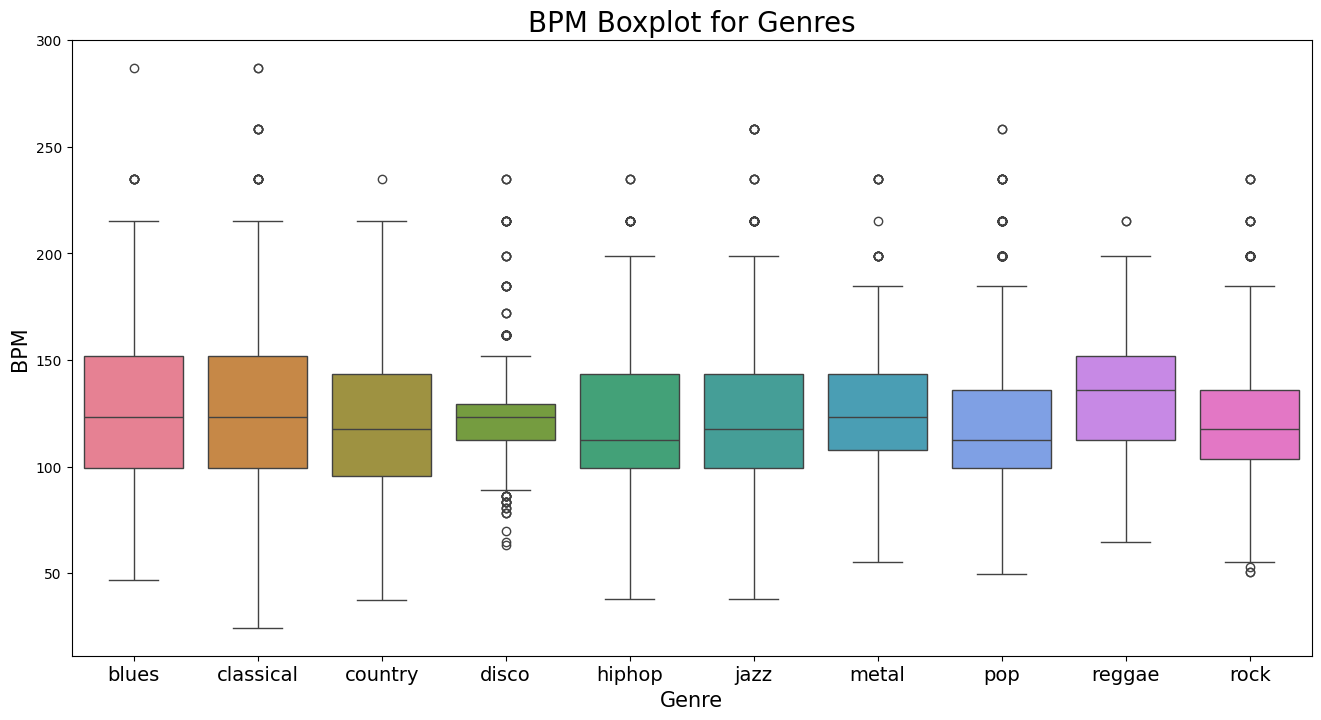

In [9]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

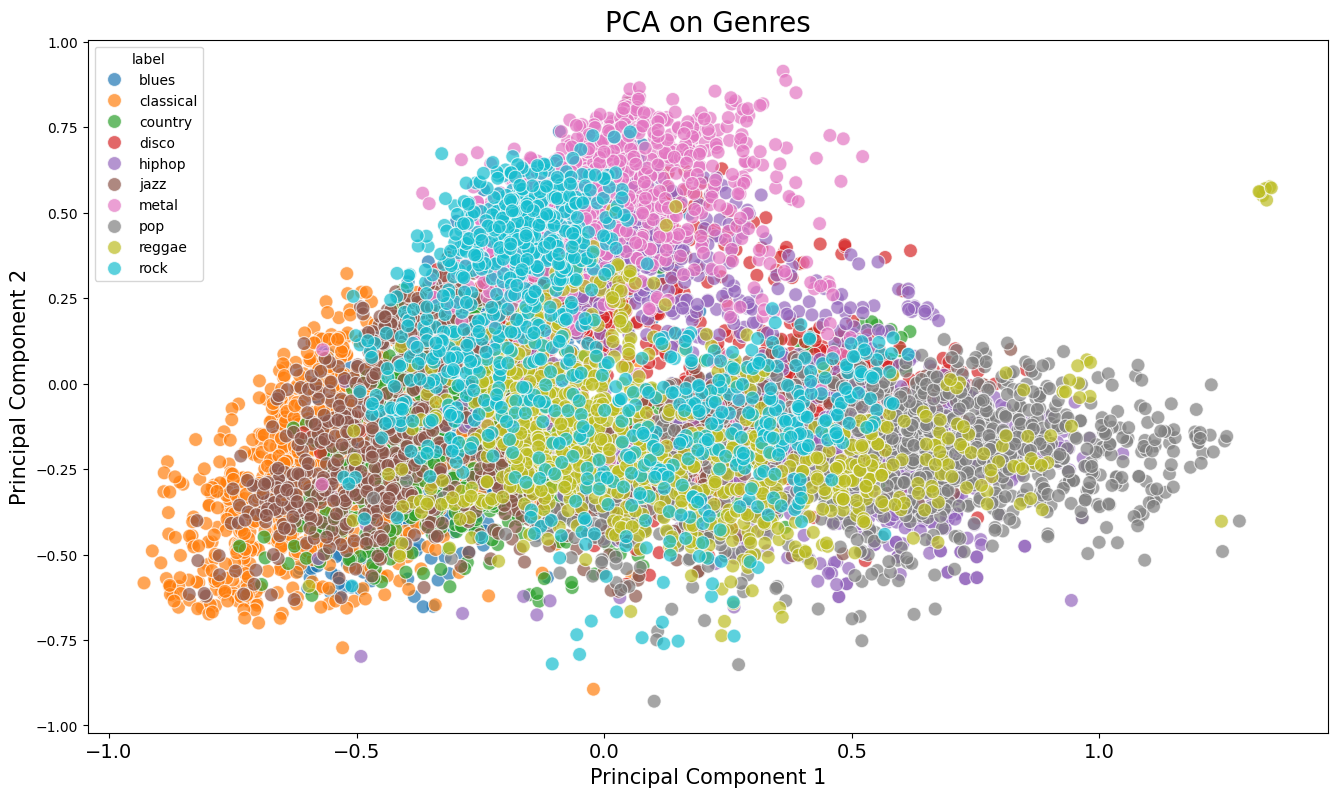

In [10]:
import sklearn.preprocessing as skp
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

## Model

In [11]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [12]:
DATASET_PATH = "Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [13]:
import os, json, math
import librosa

def _safe_load(file_path, sr):
    """Load audio safely. Returns (y, sr) or (None, None) if it fails."""
    try:
        y, sr_native = librosa.load(file_path, sr=sr, mono=True)
        if y is None or len(y) == 0:
            raise ValueError("Empty audio")
        return y, sr_native
    except Exception as e:
        print(f"[SKIP] {file_path}\n       {type(e).__name__}: {e}")
        return None, None


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5,
              skip_files=None):
    """
    Extract MFCCs from a music dataset and save them to a JSON file with genre labels.

    dataset_path: root folder containing genre subfolders
    json_path: output JSON path
    skip_files: optional set/list of full paths to skip (normalized)
    """

    if skip_files is None:
        skip_files = set()
    # normalize skip paths for reliable comparison (Windows vs Linux separators)
    skip_files = {os.path.normpath(p) for p in skip_files}

    data = {"mapping": [], "labels": [], "mfcc": []}

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    # librosa frame count can vary by 1 depending on centering/padding; compute a target and accept ±1
    target_frames = int(math.ceil(samples_per_segment / hop_length))

    # Walk the dataset
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        # Only process immediate genre subfolders (not the root itself)
        if os.path.normpath(dirpath) == os.path.normpath(dataset_path):
            continue

        genre = os.path.basename(dirpath)
        if genre not in data["mapping"]:
            data["mapping"].append(genre)

        label = data["mapping"].index(genre)
        print(f"\nProcessing: {genre}  (label={label})")

        for f in filenames:
            if not f.lower().endswith((".wav", ".mp3", ".flac", ".ogg", ".m4a", ".aac")):
                continue

            file_path = os.path.normpath(os.path.join(dirpath, f))
            if file_path in skip_files:
                print(f"[SKIP-MANUAL] {file_path}")
                continue

            signal, sample_rate = _safe_load(file_path, sr=SAMPLE_RATE)
            if signal is None:
                continue

            # process segments
            for d in range(num_segments):
                start = samples_per_segment * d
                finish = start + samples_per_segment

                # skip if segment is too short (end of file issues)
                if finish > len(signal):
                    continue

                mfcc = librosa.feature.mfcc(
                    y=signal[start:finish],
                    sr=sample_rate,
                    n_mfcc=num_mfcc,
                    n_fft=n_fft,
                    hop_length=hop_length
                ).T  # (frames, n_mfcc)

                # accept target_frames ± 1 to avoid dropping tons of samples
                if abs(len(mfcc) - target_frames) <= 1:
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(label)
                    print(f"{file_path}, segment:{d+1}")

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

    print(f"\nSaved: {json_path}")
    print(f"Total samples: {len(data['mfcc'])}")

In [14]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: blues  (label=0)
Data\genres_original\blues\blues.00000.wav, segment:1
Data\genres_original\blues\blues.00000.wav, segment:2
Data\genres_original\blues\blues.00000.wav, segment:3
Data\genres_original\blues\blues.00000.wav, segment:4
Data\genres_original\blues\blues.00000.wav, segment:5
Data\genres_original\blues\blues.00000.wav, segment:6
Data\genres_original\blues\blues.00000.wav, segment:7
Data\genres_original\blues\blues.00000.wav, segment:8
Data\genres_original\blues\blues.00000.wav, segment:9
Data\genres_original\blues\blues.00000.wav, segment:10
Data\genres_original\blues\blues.00001.wav, segment:1
Data\genres_original\blues\blues.00001.wav, segment:2
Data\genres_original\blues\blues.00001.wav, segment:3
Data\genres_original\blues\blues.00001.wav, segment:4
Data\genres_original\blues\blues.00001.wav, segment:5
Data\genres_original\blues\blues.00001.wav, segment:6
Data\genres_original\blues\blues.00001.wav, segment:7
Data\genres_original\blues\blues.00001.wav, segment

C:\Users\aruna\AppData\Local\Temp\ipykernel_46024\4000011780.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr_native = librosa.load(file_path, sr=sr, mono=True)
c:\Users\aruna\Desktop\EDU\SEM3\ECE-5831 - Pattern Recognition and NN\Project\MusicGenreClassifier\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[SKIP] Data\genres_original\jazz\jazz.00054.wav
       NoBackendError: 
Data\genres_original\jazz\jazz.00055.wav, segment:1
Data\genres_original\jazz\jazz.00055.wav, segment:2
Data\genres_original\jazz\jazz.00055.wav, segment:3
Data\genres_original\jazz\jazz.00055.wav, segment:4
Data\genres_original\jazz\jazz.00055.wav, segment:5
Data\genres_original\jazz\jazz.00055.wav, segment:6
Data\genres_original\jazz\jazz.00055.wav, segment:7
Data\genres_original\jazz\jazz.00055.wav, segment:8
Data\genres_original\jazz\jazz.00055.wav, segment:9
Data\genres_original\jazz\jazz.00055.wav, segment:10
Data\genres_original\jazz\jazz.00056.wav, segment:1
Data\genres_original\jazz\jazz.00056.wav, segment:2
Data\genres_original\jazz\jazz.00056.wav, segment:3
Data\genres_original\jazz\jazz.00056.wav, segment:4
Data\genres_original\jazz\jazz.00056.wav, segment:5
Data\genres_original\jazz\jazz.00056.wav, segment:6
Data\genres_original\jazz\jazz.00056.wav, segment:7
Data\genres_original\jazz\jazz.00056.wav, s

In [15]:
# path to json
DATA_PATH = "data_10.json"

In [16]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [17]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [18]:
X.shape

(9981, 130, 13)

In [19]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [20]:
X_train.shape

(7485, 130, 13, 1)

In [21]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [22]:
from keras.regularizers import l2
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())


# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(128, (2, 2), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

c:\Users\aruna\Desktop\EDU\SEM3\ECE-5831 - Pattern Recognition and NN\Project\MusicGenreClassifier\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=3)
]

In [25]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 4, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 2, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 1, 128)     │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 1, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       245,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,298 (1.15 MB)

 Trainable params: 299,594 (1.14 MB)

 Non-trainable params: 704 (2.75 KB)

In [26]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100,callbacks=callbacks)

Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3045 - loss: 2.2884 - val_accuracy: 0.4675 - val_loss: 1.5812
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4136 - loss: 1.8351 - val_accuracy: 0.4916 - val_loss: 1.4384
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4620 - loss: 1.6434 - val_accuracy: 0.5300 - val_loss: 1.3629
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4895 - loss: 1.5274 - val_accuracy: 0.5641 - val_loss: 1.2709
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5178 - loss: 1.4535 - val_accuracy: 0.5825 - val_loss: 1.2141
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5512 - loss: 1.3541 - val_accuracy: 0.6138 - val_loss: 1.1436
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5551 - loss: 1.3259 - val_accuracy: 0.5946 - val_loss: 1.1611
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5801 - loss: 1.2584 - 

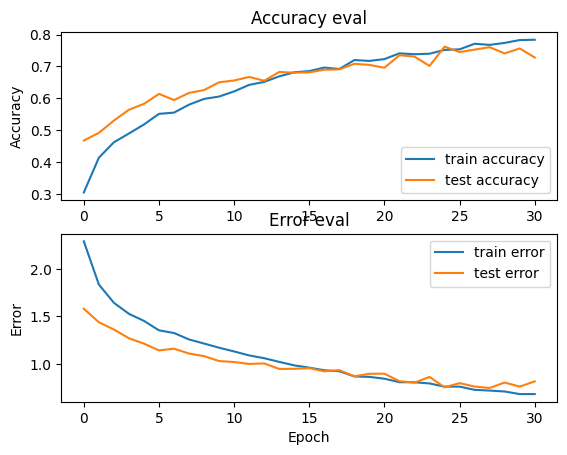

In [27]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()


# plot accuracy and error as a function of the epochs
plot_history(history)

In [28]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df.tail(10)

,accuracy,loss,val_accuracy,val_loss
21,0.741082,0.809312,0.735176,0.819867
22,0.738277,0.808647,0.730769,0.805149
23,0.739880,0.796303,0.701522,0.864686
24,0.751770,0.762672,0.762019,0.755857
25,0.753641,0.763131,0.745192,0.799542
26,0.771142,0.729194,0.752804,0.763720
27,0.767669,0.721447,0.760417,0.748793
28,0.773814,0.711818,0.740785,0.805939
29,0.782766,0.684522,0.756410,0.763155
30,0.783701,0.684563,0.727965,0.817631


In [29]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

78/78 - 0s - 3ms/step - accuracy: 0.7280 - loss: 0.8176

Test accuracy: 0.7279647588729858


In [30]:
model_cnn.save("MusicGenre_CNN.h5")

In [31]:
new_model = keras.models.load_model("MusicGenre_CNN.h5")
new_model.evaluate(X_test,y_test,batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7280 - loss: 0.8176


[0.8176305294036865, 0.7279647588729858]

## Testing

In [32]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [33]:
X_to_predict.shape

(130, 13, 1)

In [34]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [35]:
X_to_predict.shape

(1, 130, 13, 1)

In [36]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [37]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 9


C:\Users\aruna\AppData\Local\Temp\ipykernel_46024\3289486019.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


In [38]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Genre: 5


C:\Users\aruna\AppData\Local\Temp\ipykernel_46024\2236552316.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


In [39]:
import random
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Genre: 4

Real Genre: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Genre: 3

Real Genre: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

C:\Users\aruna\AppData\Local\Temp\ipykernel_46024\683555675.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Genre: 5

Real Genre: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Genre: 5

Real Genre: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Genre: 8

Real Genre: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Genre: 7

Real Genre: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Genre: 7

Real Genre: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Genre: 7

Real Genre: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Genre: 7

Real Genre: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Genre: 6


## Additional Plots

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# If your y_test is one-hot, convert to class ids
def to_class_ids(y):
    y = np.asarray(y)
    return np.argmax(y, axis=1) if y.ndim > 1 else y.astype(int)

# Define labels in the same order your model outputs (0..9)
# Use the same mapping you used for inference
class_names = ["disco","pop","classical","metal","rock","blues","hiphop","reggae","country","jazz"]

Confusion Matrix - Raw and Normalised

<Figure size 900x900 with 0 Axes>

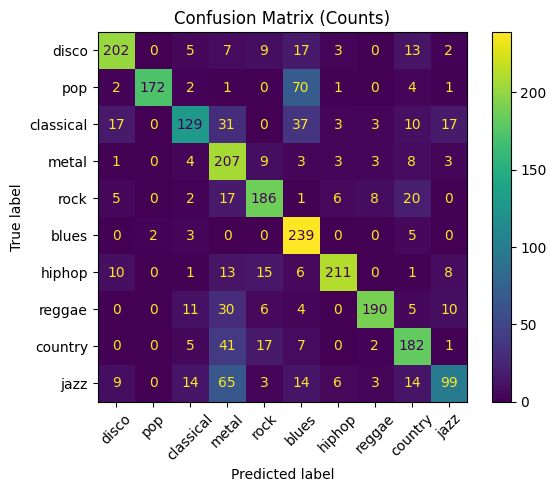

<Figure size 900x900 with 0 Axes>

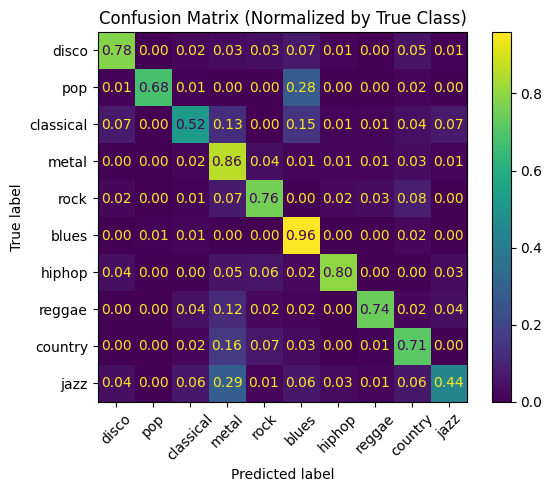

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = to_class_ids(y_test)
y_prob = model_cnn.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(9, 9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=None, values_format="d")  # no custom cmap needed
plt.title("Confusion Matrix (Counts)")
plt.show()

# Normalized (row-wise): each row sums to 1
cm_norm = cm.astype(float) / np.maximum(cm.sum(axis=1, keepdims=True), 1)

plt.figure(figsize=(9, 9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=None, values_format=".2f")
plt.title("Confusion Matrix (Normalized by True Class)")
plt.show()


Classification Report + per-class F1 bar chart

              precision    recall  f1-score   support

       disco     0.8211    0.7829    0.8016       258
         pop     0.9885    0.6798    0.8056       253
   classical     0.7330    0.5223    0.6099       247
       metal     0.5024    0.8589    0.6340       241
        rock     0.7592    0.7592    0.7592       245
       blues     0.6005    0.9598    0.7388       249
      hiphop     0.9056    0.7962    0.8474       265
      reggae     0.9091    0.7422    0.8172       256
     country     0.6947    0.7137    0.7041       255
        jazz     0.7021    0.4361    0.5380       227

    accuracy                         0.7280      2496
   macro avg     0.7616    0.7251    0.7256      2496
weighted avg     0.7648    0.7280    0.7290      2496



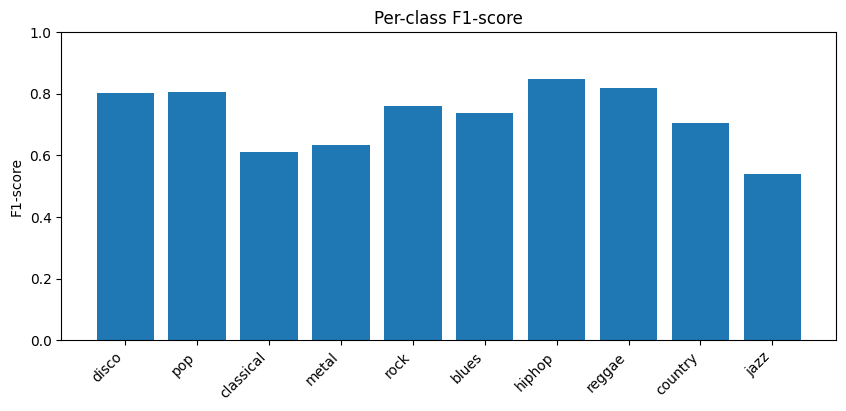

In [52]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

prec, rec, f1, sup = precision_recall_fscore_support(y_true, y_pred, labels=range(len(class_names)))

plt.figure(figsize=(10, 4))
plt.bar(class_names, f1)
plt.xticks(rotation=45, ha="right")
plt.ylabel("F1-score")
plt.title("Per-class F1-score")
plt.ylim(0, 1.0)
plt.show()


Top-k Accuracy (Top-1 / Top-3 / Top-5)

In [53]:
def topk_accuracy(y_true_ids, y_prob, k=3):
    topk = np.argsort(y_prob, axis=1)[:, -k:]  # last k are top-k
    return np.mean([y_true_ids[i] in topk[i] for i in range(len(y_true_ids))])

top1 = topk_accuracy(y_true, y_prob, k=1)
top3 = topk_accuracy(y_true, y_prob, k=3)
top5 = topk_accuracy(y_true, y_prob, k=5)

print(f"Top-1 Acc: {top1:.4f}")
print(f"Top-3 Acc: {top3:.4f}")
print(f"Top-5 Acc: {top5:.4f}")


Top-1 Acc: 0.7280
Top-3 Acc: 0.9455
Top-5 Acc: 0.9892


ROC-AUC (One-vs-Rest) + macro/micro AUC

Macro AUC (OvR): 0.9714
Micro AUC (OvR): 0.9681


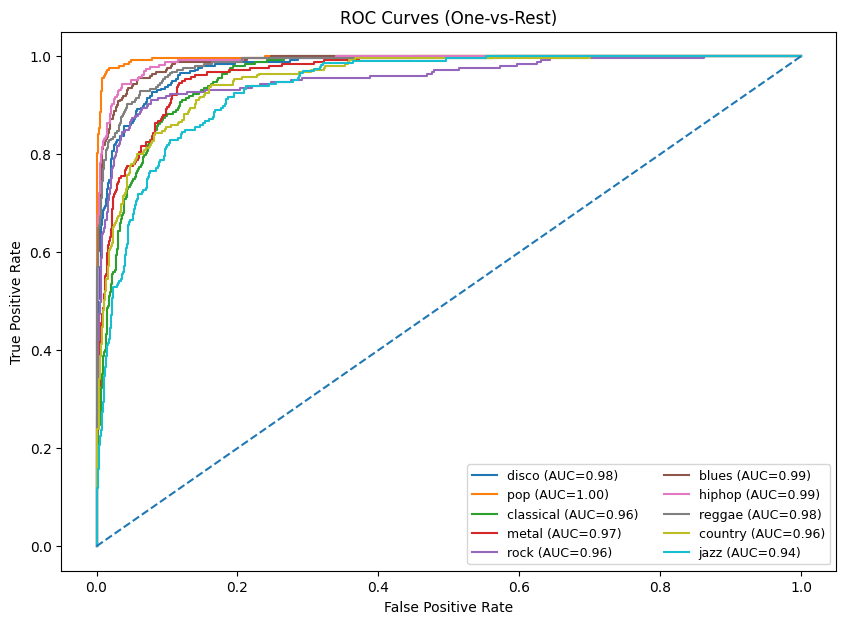

In [65]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

n_classes = len(class_names)
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))  # shape (N, C)

# Macro and micro AUC
macro_auc = roc_auc_score(y_true_bin, y_prob, average="macro", multi_class="ovr")
micro_auc = roc_auc_score(y_true_bin, y_prob, average="micro", multi_class="ovr")
print("Macro AUC (OvR):", round(macro_auc, 4))
print("Micro AUC (OvR):", round(micro_auc, 4))

# Plot ROC for each class (can be busy, but very report-worthy)
plt.figure(figsize=(10, 7))
for c in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, c], y_prob[:, c])
    plt.plot(fpr, tpr, label=f"{class_names[c]} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend(ncol=2, fontsize=9)
plt.show()


Confidence + error analysis - are wrong predictions “confident”?

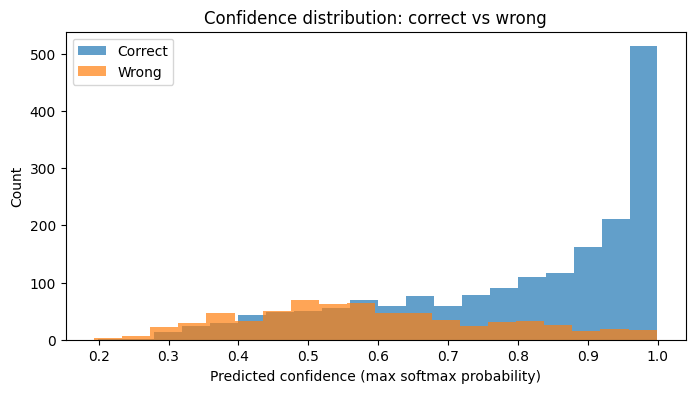

Avg confidence (correct): 0.8028972
Avg confidence (wrong):   0.5880041


In [55]:
conf = np.max(y_prob, axis=1)
correct = (y_pred == y_true)

plt.figure(figsize=(8,4))
plt.hist(conf[correct], bins=20, alpha=0.7, label="Correct")
plt.hist(conf[~correct], bins=20, alpha=0.7, label="Wrong")
plt.xlabel("Predicted confidence (max softmax probability)")
plt.ylabel("Count")
plt.title("Confidence distribution: correct vs wrong")
plt.legend()
plt.show()

print("Avg confidence (correct):", conf[correct].mean())
print("Avg confidence (wrong):  ", conf[~correct].mean())


Segment-level agreement plot - This plot shows whether segments agree

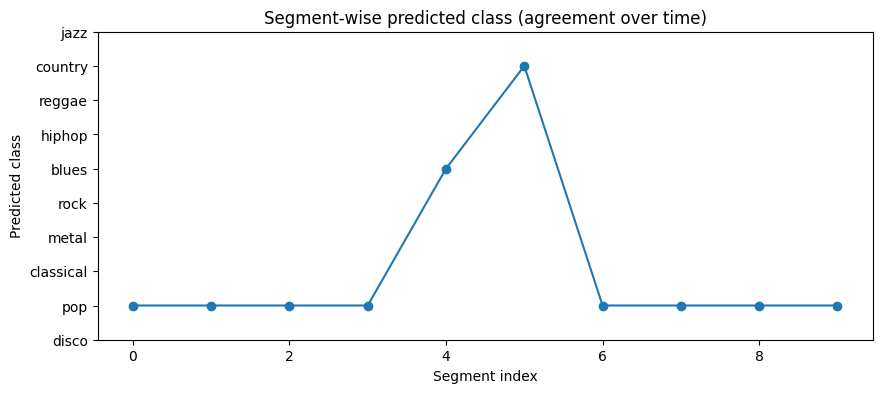

Averaged Top-3:
  pop: 0.6162
  blues: 0.2097
  country: 0.1259


In [64]:
def plot_segment_agreement(X_segments, true_label=None):
    # X_segments: (segments, 130, 13, 1)
    seg_probs = model_cnn.predict(X_segments, verbose=0)  # (S, C)
    seg_pred = np.argmax(seg_probs, axis=1)
    avg = seg_probs.mean(axis=0)
    top3 = avg.argsort()[-3:][::-1]

    plt.figure(figsize=(10,4))
    plt.plot(seg_pred, marker="o")
    plt.yticks(range(len(class_names)), class_names)
    plt.xlabel("Segment index")
    plt.ylabel("Predicted class")
    plt.title("Segment-wise predicted class (agreement over time)")
    if true_label is not None:
        plt.axhline(true_label, linestyle="--", linewidth=1)
    plt.show()

    print("Averaged Top-3:")
    for idx in top3:
        print(f"  {class_names[idx]}: {avg[idx]:.4f}")
plot_segment_agreement(X_to_predict)
# Example: take one test item and simulate 10 segments if your X_test is already per-segment input.
# If X_test is single segments, skip this and use your external-track extractor that returns 10 segments.


Calibration & Reliability Diagram - Does the model know when it is unsure?

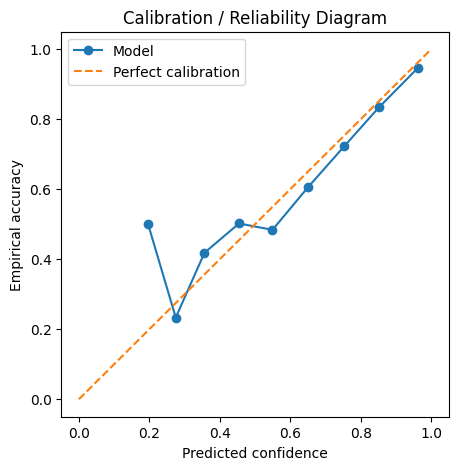

In [58]:
from sklearn.calibration import calibration_curve

y_true_ids = to_class_ids(y_test)
y_prob = model_cnn.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

confidence = np.max(y_prob, axis=1)
correct = (y_pred == y_true_ids).astype(int)

prob_true, prob_pred = calibration_curve(correct, confidence, n_bins=10)

plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0,1],[0,1],'--', label="Perfect calibration")
plt.xlabel("Predicted confidence")
plt.ylabel("Empirical accuracy")
plt.title("Calibration / Reliability Diagram")
plt.legend()
plt.show()
